# Problem Statement:Predict the Loan amount
Buying a house requires a lot of careful planning. Once you have finalized your budget abd the house that you want to buy you must ensure that you have sufficient funds to pay the seller.

With rising property rates,most people avail home loans to buy their dream houses. The  bank only lends up to 80% of the total amount based on a person's finances(salary,outgoing expenses,existing loans,etc.).You will need to make the rest of the payment yourself after the bank tells you how much they can lend.






TASK:

You work for XYZ bank.Predict the loan amount that can be sanctioned to customers who have apllied for a home loan using the features provided in the dataset


## Import required packages


In [8]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
pd.pandas.set_option('display.max_columns',None)
pd.pandas.set_option('display.max_rows',None)
from warnings import filterwarnings
filterwarnings('ignore')


For this practice problem, we have been given two CSV files: train and test.

Train file will be used for training the model, i.e. our model will learn from this file. It contains all the independent variables and the target variable.

Test file contains all the independent variables, but not the target variable. We will apply the model to predict the target variable for the test data.



## Read Train and Test Data


In [9]:
train=pd.read_csv("ciplatrain.csv")
test=pd.read_csv("ciplatest.csv")

## Copy of original data

Let’s make a copy of train and test data so that even if we have to make any changes in these datasets we would not lose the original datasets.

In [10]:
train_original = train.copy()
test_original = test.copy()

## Understanding the Data

In this section, we will look at the structure of the train and test datasets. Firstly, we will check the features present in our data and then we will look at their data types.

In [11]:
train.columns

Index(['Customer ID', 'Name', 'Gender', 'Age', 'Income (USD)',
       'Income Stability', 'Profession', 'Type of Employment', 'Location',
       'Loan Amount Request (USD)', 'Current Loan Expenses (USD)',
       'Expense Type 1', 'Expense Type 2', 'Dependents', 'Credit Score',
       'No. of Defaults', 'Has Active Credit Card', 'Property ID',
       'Property Age', 'Property Type', 'Property Location', 'Co-Applicant',
       'Property Price', 'Loan Sanction Amount (USD)'],
      dtype='object')

We have 23 independent variables and 1 target variable, i.e. Loan Sanction Amount (USD) in the train dataset. 

For the test dataset We have similar features in the test dataset as the train dataset except the Loan Sanction Amount (USD). We will predict the Loan Sanction Amount (USD) using the model that we will build using the train data.

## Print the data types

In [12]:
train.dtypes

Customer ID                     object
Name                            object
Gender                          object
Age                              int64
Income (USD)                   float64
Income Stability                object
Profession                      object
Type of Employment              object
Location                        object
Loan Amount Request (USD)      float64
Current Loan Expenses (USD)    float64
Expense Type 1                  object
Expense Type 2                  object
Dependents                     float64
Credit Score                   float64
No. of Defaults                  int64
Has Active Credit Card          object
Property ID                      int64
Property Age                   float64
Property Type                    int64
Property Location               object
Co-Applicant                     int64
Property Price                 float64
Loan Sanction Amount (USD)     float64
dtype: object

We can see there are three format of data types:

object: Object format means variables are categorical. Categorical variables in our dataset are: Customer ID,Name,Gender,
 Income Stability,Profession,Type of Employment,Location,Expense Type 1,Expense Type 2,Has Active Credit Card,Property Location.

int64: It represents the integer variables. Age,No. of Defaults,Property ID ,Property Type ,Co-Applicant are of this format.

float64: It represents the variable which have some decimal values involved. They are also numerical variables. float variables in our dataset are: Income (USD) ,Loan Amount Request (USD),Current Loan Expenses (USD),Dependents,Credit Score,Property Age,
Property Price,Loan Sanction Amount (USD).

In [13]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 24 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   Customer ID                  30000 non-null  object 
 1   Name                         30000 non-null  object 
 2   Gender                       29947 non-null  object 
 3   Age                          30000 non-null  int64  
 4   Income (USD)                 25424 non-null  float64
 5   Income Stability             28317 non-null  object 
 6   Profession                   30000 non-null  object 
 7   Type of Employment           22730 non-null  object 
 8   Location                     30000 non-null  object 
 9   Loan Amount Request (USD)    30000 non-null  float64
 10  Current Loan Expenses (USD)  29828 non-null  float64
 11  Expense Type 1               30000 non-null  object 
 12  Expense Type 2               30000 non-null  object 
 13  Dependents      

## Shape of datasets

In [14]:
print('Training data shape: ', train.shape)
train.head()

Training data shape:  (30000, 24)


Customer ID               Name Gender  Age  Income (USD) Income Stability  \
0     C-36995   Frederica Shealy      F   56       1933.05              Low   
1     C-33999  America Calderone      M   32       4952.91              Low   
2      C-3770      Rosetta Verne      F   65        988.19             High   
3     C-26480         Zoe Chitty      F   65           NaN             High   
4     C-23459       Afton Venema      F   31       2614.77              Low   

  Profession     Type of Employment    Location  Loan Amount Request (USD)  \
0    Working            Sales staff  Semi-Urban                   72809.58   
1    Working                    NaN  Semi-Urban                   46837.47   
2  Pensioner                    NaN  Semi-Urban                   45593.04   
3  Pensioner                    NaN       Rural                   80057.92   
4    Working  High skill tech staff  Semi-Urban                  113858.89   

   Current Loan Expenses (USD) Expense Type 1 Expense Type 2  Dependents  \
0                       241.08              N              N         3.0   
1                       495.81              N              Y         1.0   
2                       171.95              N              Y         1.0   
3                       298.54              N              Y         2.0   
4                       491.41              N              Y         NaN   

   Credit Score  No. of Defaults Has Active Credit Card  Property ID  \
0        809.44                0                    NaN          746   
1        780.40                0            Unpossessed          608   
2        833.15                0            Unpossessed          546   
3        832.70                1            Unpossessed          890   
4        745.55                1                 Active          715   

   Property Age  Property Type Property Location  Co-Applicant  \
0       1933.05              4             Rural             1   
1       4952.91              2             Rural             1   
2        988.19              2             Urban             0   
3           NaN              2        Semi-Urban             1   
4       2614.77              4        Semi-Urban             1   

   Property Price  Loan Sanction Amount (USD)  
0       119933.46                    54607.18  
1        54791.00                    37469.98  
2        72440.58                    36474.43  
3       121441.51                    56040.54  
4       208567.91                    74008.28

In [15]:
print('Training data shape: ', test.shape)
test.head()

Training data shape:  (20000, 23)


Customer ID              Name Gender  Age  Income (USD) Income Stability  \
0     C-26247  Tandra Olszewski      F   47       3472.69              Low   
1     C-35067     Jeannette Cha      F   57       1184.84              Low   
2     C-34590      Keva Godfrey      F   52       1266.27              Low   
3     C-16668      Elva Sackett      M   65       1369.72             High   
4     C-12196    Sade Constable      F   60       1939.23             High   

             Profession Type of Employment    Location  \
0  Commercial associate           Managers  Semi-Urban   
1               Working        Sales staff       Rural   
2               Working                NaN  Semi-Urban   
3             Pensioner                NaN       Rural   
4             Pensioner                NaN       Urban   

   Loan Amount Request (USD)  Current Loan Expenses (USD) Expense Type 1  \
0                  137088.98                       396.72              N   
1                  104771.59                       463.76              Y   
2                  176684.91                       493.15              N   
3                   97009.18                       446.15              N   
4                  109980.00                       370.10              N   

  Expense Type 2  Dependents  Credit Score  No. of Defaults  \
0              N         2.0        799.14                0   
1              Y         2.0        833.31                0   
2              Y         3.0        627.44                0   
3              Y         2.0        833.20                0   
4              N         NaN           NaN                0   

  Has Active Credit Card  Property ID  Property Age  Property Type  \
0            Unpossessed          843       3472.69              2   
1            Unpossessed           22       1184.84              1   
2            Unpossessed            1       1266.27              1   
3               Inactive          730       1369.72              1   
4                    NaN          356       1939.23              4   

  Property Location Co-Applicant Property Price  
0             Urban            1       236644.5  
1             Rural            1       142357.3  
2             Urban            1      300991.24  
3        Semi-Urban            0       125612.1  
4        Semi-Urban            1       180908.0

## Univariate Analysis

In this section, we will do univariate analysis. It is the simplest form of analyzing data where we examine each variable individually.

For categorical features we can use frequency table or bar plots which will calculate the number of each category in a particular variable.

For numerical features, probability density plots can be used to look at the distribution of the variable.

#### First look target variable

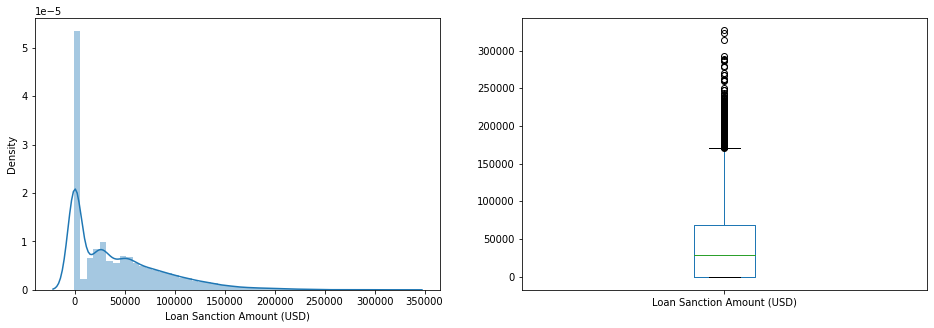

In [16]:
plt.figure(1)
plt.subplot(121)
df = train.dropna()
sns.distplot(df["Loan Sanction Amount (USD)"]);

plt.subplot(122)
df["Loan Sanction Amount (USD)"].plot.box(figsize=(16,5))
plt.show()

<AxesSubplot:>

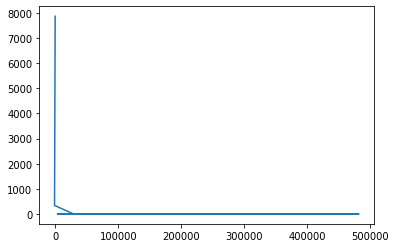

In [17]:
train["Loan Sanction Amount (USD)"].value_counts().plot()

Around 8000 value in target variable are 0.0 and from box plot we can see lots of outliers present in target variable

### 2. Gender column
- it has approx balance number of Female vs Male count those applied for Home loan.just 53 are only null values

In [18]:
print(train.Gender.count())
train["Gender"].value_counts()

29947


M    15053
F    14894
Name: Gender, dtype: int64

<AxesSubplot:title={'center':'Gender'}>

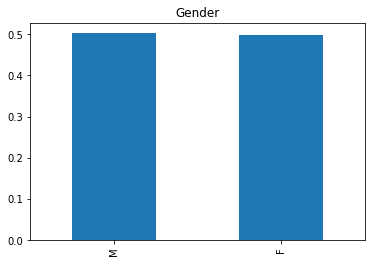

In [19]:
train['Gender'].value_counts(normalize=True).plot.bar(title= 'Gender')

### 3.Age variable

In [20]:
print(train.Age.count())
train["Age"].value_counts()

30000


18    4378
65    1349
64     813
61     787
62     784
60     774
63     712
57     538
47     536
44     523
23     520
45     519
34     518
28     517
50     515
58     514
41     514
26     513
27     511
21     510
38     509
42     508
56     507
53     507
24     503
39     502
30     501
20     499
36     495
55     493
43     492
29     492
59     492
32     492
33     491
48     489
52     484
46     484
51     482
19     482
31     480
37     478
35     476
25     470
22     469
54     462
49     458
40     458
Name: Age, dtype: int64

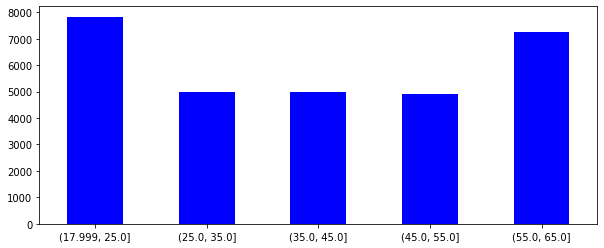

In [21]:
output = pd.cut(train['Age'], bins=[18, 25, 35, 45,55,65], include_lowest=True)
ax = output.value_counts(sort=False).plot.bar(rot=0, color="b", figsize=(10,4))
plt.show()

From seeing above graph we can say that young people age between 18-25 and old people age between 55-65 have more chances for taking Home loan cuz it's young generation dream to own home.

In [22]:
print(train['Income (USD)'].count())
print(train["Income (USD)"].isnull().sum())

25424
4576


Around 16% of Income values are null its mean either they have no source of income or doesn't specify 

In [23]:
print(train['Income Stability'].count())
train["Income Stability"].value_counts()

28317


Low     25751
High     2566
Name: Income Stability, dtype: int64

<AxesSubplot:title={'center':'Income Stability'}>

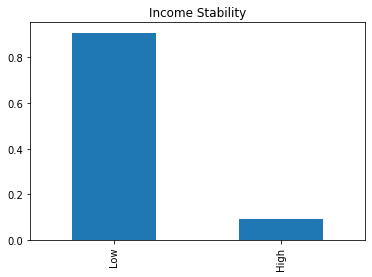

In [24]:
train["Income Stability"].value_counts(normalize=True).plot.bar(title="Income Stability")

People who have low income stability have higher chances for applying home loan. around 87% have low income stability

In [25]:
print(train['Profession'].count())
train["Profession"].value_counts()


30000


Working                 16926
Commercial associate     7962
Pensioner                2740
State servant            2366
Unemployed                  2
Businessman                 2
Maternity leave             1
Student                     1
Name: Profession, dtype: int64

In [26]:
train["Profession"].value_counts(normalize=True).plot.bar(title="Profession")

<AxesSubplot:title={'center':'Profession'}>

80% of home loan applied by working professional including both Working and Commercial associate

In [27]:

print(train['Type of Employment'].count())
train["Type of Employment"].value_counts()

22730


Laborers                 5578
Sales staff              3736
Core staff               3230
Managers                 2495
Drivers                  1606
Accountants              1379
High skill tech staff    1307
Medicine staff            864
Security staff            579
Cooking staff             566
Private service staff     342
Cleaning staff            341
Low-skill Laborers        162
Secretaries               161
Waiters/barmen staff      149
Realty agents              86
IT staff                   77
HR staff                   72
Name: Type of Employment, dtype: int64

from the above data it show that most of home loan applied by low or mid level worker

In [28]:
print(train['Location'].count())
train["Location"].value_counts()

30000


Semi-Urban    21563
Rural          5338
Urban          3099
Name: Location, dtype: int64

<AxesSubplot:title={'center':'Location'}>

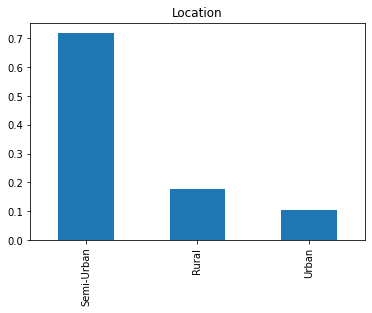

In [29]:
train["Location"].value_counts(normalize=True).plot.bar(title="Location")

70% customer came from the semi-urban areas where taking home loan are not costly as compared to urban areas

In [30]:
plt.figure(1)
plt.subplot(121)
df = train.dropna()
sns.distplot(df["Loan Amount Request (USD)"]);

plt.subplot(122)
df["Loan Amount Request (USD)"].plot.box(figsize=(16,5))
plt.show()

most of amount requested by customers are less than 250000$ but we see lot of outliers in this variable and ditribution is fairly right skewed

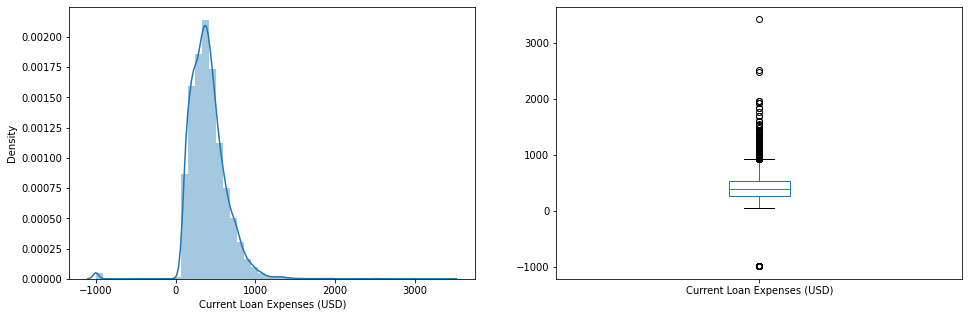

In [31]:
plt.figure(1)
plt.subplot(121)
df = train.dropna()
sns.distplot(df["Current Loan Expenses (USD)"]);

plt.subplot(122)
df["Current Loan Expenses (USD)"].plot.box(figsize=(16,5))
plt.show()

customers have current loan expenses between 0 to 1000usd  but mostly less than 500$.we see lots of ouliers also in this feature and due to uncomman number -999.0 it's distribution also look like right skewed

In [32]:
print(train['Expense Type 1'].count())
train["Expense Type 1"].value_counts()

30000


N    19214
Y    10786
Name: Expense Type 1, dtype: int64

In [33]:
train["Expense Type 1"].value_counts(normalize=True).plot.bar(title="Expense Type 1")

<AxesSubplot:title={'center':'Expense Type 1'}>

In [34]:
print(train['Expense Type 2'].count())
train["Expense Type 2"].value_counts()

30000


Y    20180
N     9820
Name: Expense Type 2, dtype: int64

In [35]:
train["Expense Type 2"].value_counts(normalize=True).plot.bar(title="Expense Type 2")

<AxesSubplot:title={'center':'Expense Type 2'}>

from the above two results we can see that for expenses type 1 feature customers which have expenses are only 1/3 part of total but for expenses type 2 feature it is shown that 2/3 part of customers have expenses 

In [36]:
print(train['Dependents'].count())
train["Dependents"].value_counts()

27507


2.0     13108
3.0      5719
1.0      5544
4.0      2704
5.0       372
6.0        50
7.0         7
8.0         1
14.0        1
10.0        1
Name: Dependents, dtype: int64

<AxesSubplot:title={'center':'Dependents'}>

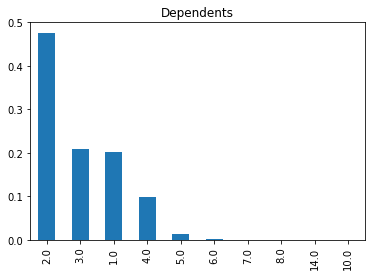

In [37]:
train["Dependents"].value_counts(normalize=True).plot.bar(title="Dependents")

most of customers are dependent on their families member

In [38]:
plt.figure(1)
plt.subplot(121)
df = train.dropna()
sns.distplot(df["Credit Score"]);

plt.subplot(122)
df["Credit Score"].plot.box(figsize=(16,5))
plt.show()

As we can see data distribution is fairly normal ditribution with no outliers and mostly customers credit score lie between 675 to 785 that's great sign

In [39]:
print(train['No. of Defaults'].count())
train["No. of Defaults"].value_counts()

30000


0    24182
1     5818
Name: No. of Defaults, dtype: int64

In [40]:
train["No. of Defaults"].value_counts(normalize=True).plot.bar(title="No. of Defaults")

<AxesSubplot:title={'center':'No. of Defaults'}>

81% of cutomers have no history of defaults that's good for bank for sanction the loan amount

In [41]:
print(train['Has Active Credit Card'].count())
train["Has Active Credit Card"].value_counts()

28434


Active         9771
Inactive       9466
Unpossessed    9197
Name: Has Active Credit Card, dtype: int64

<AxesSubplot:title={'center':'Has Active Credit Card'}>

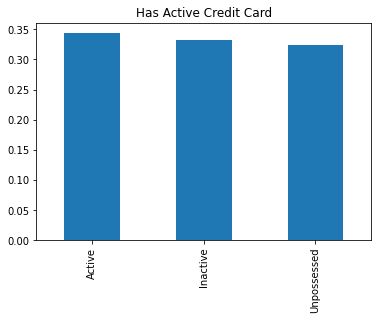

In [42]:
train["Has Active Credit Card"].value_counts(normalize=True).plot.bar(title="Has Active Credit Card")

mostly customers does not have credit card including inactive 

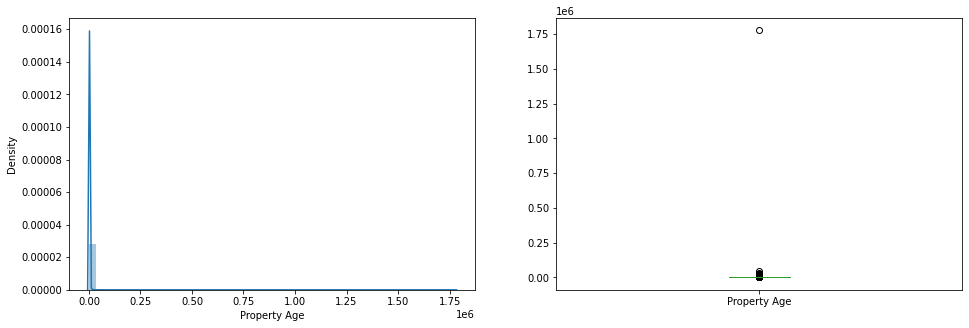

In [43]:
plt.figure(1)
plt.subplot(121)
df = train.dropna()
sns.distplot(df["Property Age"]);

plt.subplot(122)
df["Property Age"].plot.box(figsize=(16,5))
plt.show()

As we can see in left plot it's ditribution look like log normal distribution with  many outliers so we will use boxcox to perform log transformation later sections 

In [44]:
print(train['Property Age'].count())

25150


In [45]:
print(train['Property Type'].count())
train["Property Type"].value_counts()

30000


1    7863
2    7650
3    7309
4    7178
Name: Property Type, dtype: int64

<AxesSubplot:title={'center':'Property Type'}>

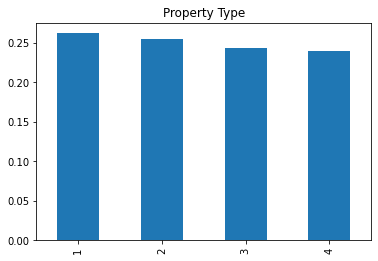

In [46]:
train["Property Type"].value_counts(normalize=True).plot.bar(title="Property Type")

In [47]:
print(train['Property Location'].count())
train["Property Location"].value_counts()

29644


Semi-Urban    10387
Rural         10041
Urban          9216
Name: Property Location, dtype: int64

<AxesSubplot:title={'center':'Property Location'}>

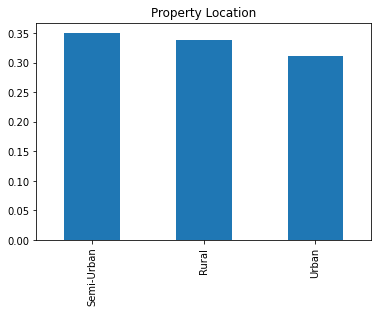

In [48]:
train["Property Location"].value_counts(normalize=True).plot.bar(title="Property Location")

In [49]:
print(train['Co-Applicant'].count())
train["Co-Applicant"].value_counts()

30000


 1      25516
 0       4316
-999      168
Name: Co-Applicant, dtype: int64

<AxesSubplot:title={'center':'Co-Applicant'}>

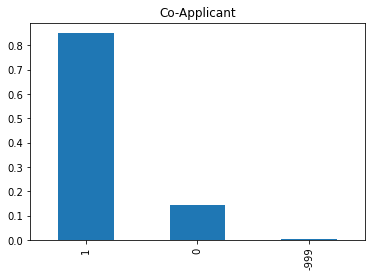

In [50]:
train["Co-Applicant"].value_counts(normalize=True).plot.bar(title="Co-Applicant")

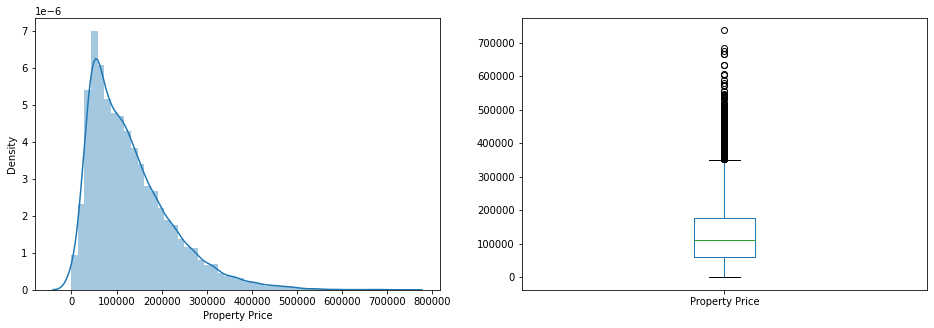

In [51]:
plt.figure(1)
plt.subplot(121)
df = train.dropna()
sns.distplot(df["Property Price"]);

plt.subplot(122)
df["Property Price"].plot.box(figsize=(16,5))
plt.show()

we see in this plot that distribution are right skewed due to present of outliers we will treat the otliers in later sections

## Correlation matrix plot of Numerical features

In [52]:
import plotly.express as px
fig = px.imshow(train.corr())
fig.show()

## Bivariate Analysis

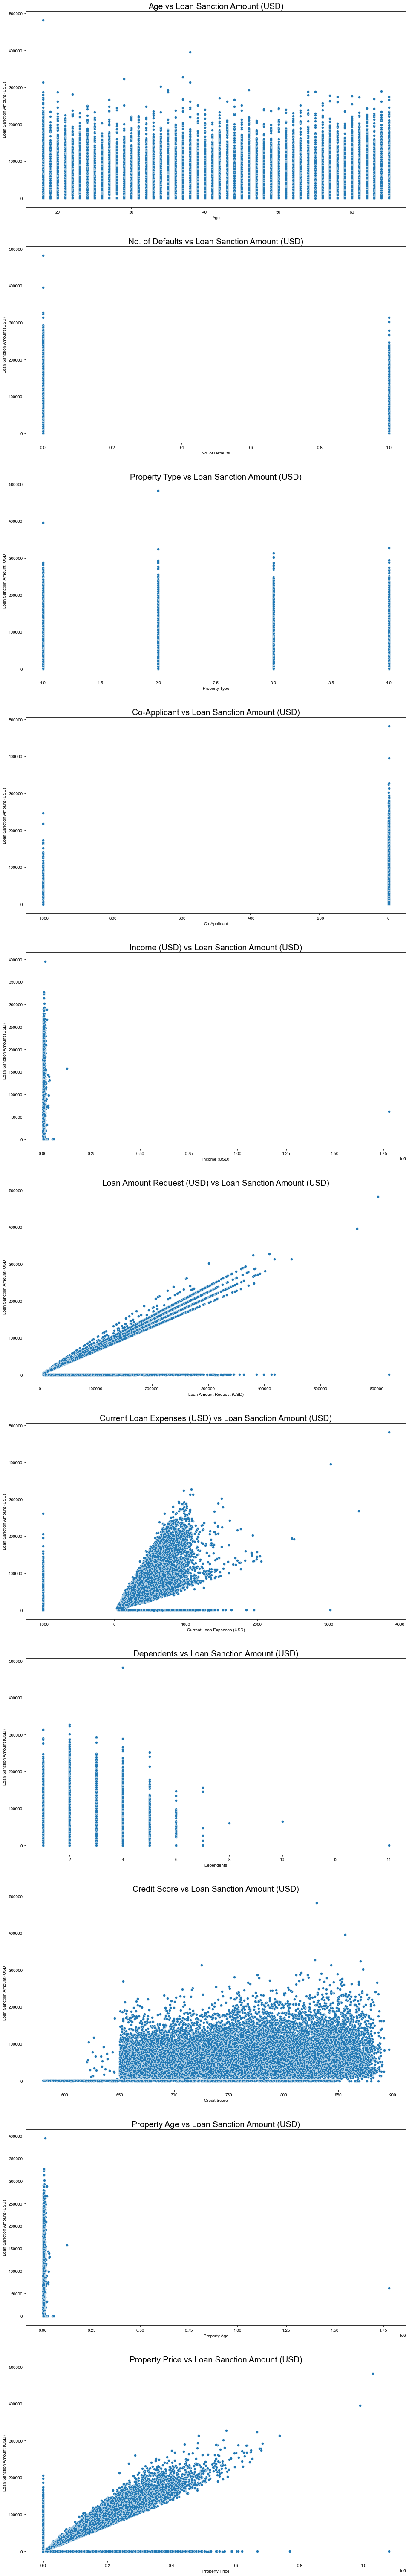

In [53]:
cols_ = [ 'Age','No. of Defaults','Property Type' ,'Co-Applicant','Income (USD)' ,'Loan Amount Request (USD)',
         'Current Loan Expenses (USD)','Dependents','Credit Score','Property Age', 'Property Price']

fig, ax = plt.subplots(nrows=len(cols_), ncols=1, figsize=(16, 10*len(cols_)))
sns.set(font_scale=1.6)

for ind, col_ in enumerate(cols_):
    sns.scatterplot(x=col_, y='Loan Sanction Amount (USD)', data=train, ax=ax[ind])
    ax[ind].set_title(f"{col_} vs Loan Sanction Amount (USD)")

## Train Data Preprocessing

In [56]:
train=train.replace(-999.0, np.nan)


In [57]:
train.describe()

Age  Income (USD)  Loan Amount Request (USD)  \
count  30000.000000  2.542400e+04               30000.000000   
mean      40.092300  2.630574e+03               88826.333855   
std       16.045129  1.126272e+04               59536.949605   
min       18.000000  3.777000e+02                6048.240000   
25%       25.000000  1.650457e+03               41177.755000   
50%       40.000000  2.222435e+03               75128.075000   
75%       55.000000  3.090593e+03              119964.605000   
max       65.000000  1.777460e+06              621497.820000   

       Current Loan Expenses (USD)    Dependents  Credit Score  \
count                 29651.000000  27507.000000  28297.000000   
mean                    409.293722      2.253027    739.885381   
std                     217.738726      0.951162     72.163846   
min                      33.760000      1.000000    580.000000   
25%                     250.745000      2.000000    681.880000   
50%                     376.530000      2.000000    739.820000   
75%                     522.470000      3.000000    799.120000   
max                    3840.880000     14.000000    896.260000   

       No. of Defaults   Property ID  Property Age  Property Type  \
count     30000.000000  30000.000000  2.515000e+04   30000.000000   
mean          0.193933    501.934700  2.631119e+03       2.460067   
std           0.395384    288.158086  1.132268e+04       1.118562   
min           0.000000      1.000000  3.777000e+02       1.000000   
25%           0.000000    251.000000  1.650450e+03       1.000000   
50%           0.000000    504.000000  2.223250e+03       2.000000   
75%           0.000000    751.000000  3.091407e+03       3.000000   
max           1.000000    999.000000  1.777460e+06       4.000000   

       Co-Applicant  Property Price  Loan Sanction Amount (USD)  
count  29832.000000    2.964800e+04                29322.000000  
mean       0.855323    1.333359e+05                48210.120452  
std        0.351781    9.297139e+04                48212.938805  
min        0.000000    7.265950e+03                    0.000000  
25%        1.000000    6.192126e+04                    0.000000  
50%        1.000000    1.112765e+05                36064.225000  
75%        1.000000    1.800713e+05                74779.277500  
max        1.000000    1.077967e+06               481907.320000

In [58]:
train.isnull().sum()

Customer ID                       0
Name                              0
Gender                           53
Age                               0
Income (USD)                   4576
Income Stability               1683
Profession                        0
Type of Employment             7270
Location                          0
Loan Amount Request (USD)         0
Current Loan Expenses (USD)     349
Expense Type 1                    0
Expense Type 2                    0
Dependents                     2493
Credit Score                   1703
No. of Defaults                   0
Has Active Credit Card         1566
Property ID                       0
Property Age                   4850
Property Type                     0
Property Location               356
Co-Applicant                    168
Property Price                  352
Loan Sanction Amount (USD)      678
dtype: int64

In [59]:
train=train.dropna(subset=['Income (USD)', 'Current Loan Expenses (USD)','Property Price'])


In [60]:
train["Gender"]=train["Gender"].fillna(train["Gender"].mode()[0])
train["Income Stability"]=train["Income Stability"].fillna(train["Income Stability"].mode()[0])
train['Type of Employment'] = train['Type of Employment'].fillna(method='ffill').fillna(method='bfill')
train["Dependents"]=train["Dependents"].fillna(0).astype(int)
train['Credit Score'] = train['Credit Score'].fillna((train['Credit Score'].mean()))
train['Property Age'] = train['Property Age'].fillna((train['Property Age'].mean()))

train["Has Active Credit Card"]=train["Has Active Credit Card"].fillna(train["Has Active Credit Card"].mode()[0])
train["Property Location"]=train["Property Location"].fillna(train["Property Location"].mode()[0])
train["Co-Applicant"]=train["Co-Applicant"].fillna(train["Co-Applicant"].mode()[0])
train["Loan Sanction Amount (USD)"]=train["Loan Sanction Amount (USD)"].fillna(0).astype(np.float64)


In [61]:
train.shape

(24905, 24)

<AxesSubplot:xlabel='Loan Sanction Amount (USD)', ylabel='Density'>

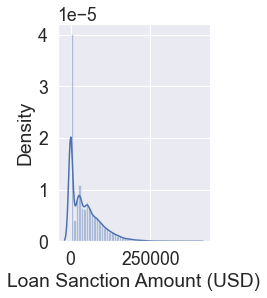

In [62]:
plt.figure(1)
plt.subplot(121)
df = train.dropna()
sns.distplot(df["Loan Sanction Amount (USD)"])

In [63]:
coll=['Income (USD)','Property Price','Property Age','Current Loan Expenses (USD)','Loan Amount Request (USD)']
for feature in coll:
    if 0 in train[feature].unique():
        pass
    else:
        train[feature]=np.log(train[feature])

In [65]:
train['Loan Sanction Amount (USD)']=train['Loan Sanction Amount (USD)'].replace(0.0,0.0001)

In [66]:
train['Loan Sanction Amount (USD)']=np.log(train['Loan Sanction Amount (USD)'])

In [68]:
train1=train.copy()

## Test Data Preprocessing

In [69]:
cat_var=[col for col in test.columns if test[col].dtypes=='O']
cat_var

['Customer ID',
 'Name',
 'Gender',
 'Income Stability',
 'Profession',
 'Type of Employment',
 'Location',
 'Expense Type 1',
 'Expense Type 2',
 'Has Active Credit Card',
 'Property Location',
 'Co-Applicant',
 'Property Price']

In [70]:
test=test.replace(-999.0, np.nan)


In [71]:
test["Gender"]=test["Gender"].fillna(test["Gender"].mode()[0])
test["Income Stability"]=test["Income Stability"].fillna(test["Income Stability"].mode()[0])
test['Type of Employment'] = test['Type of Employment'].fillna(method='ffill').fillna(method='bfill')
test["Has Active Credit Card"]=test["Has Active Credit Card"].fillna(test["Has Active Credit Card"].mode()[0])
test["Property Location"]=test["Property Location"].fillna(test["Property Location"].mode()[0])

In [72]:
test.loc[(test['Co-Applicant'] == '?'),'Co-Applicant'] = '0'
test['Co-Applicant'] = test['Co-Applicant'].astype(int)

PropertyPrice = test[test['Property Price'] != '?']['Property Price']
PropertyPrice = PropertyPrice.astype(float)
test.loc[(test['Property Price'] == '?'),'Property Price'] = PropertyPrice.mean()
test.loc[(test['Property Price'] == np.NaN),'Property Price'] = PropertyPrice.mean()
test['Property Price'] = test['Property Price'].astype(np.float32)

In [73]:
test["Dependents"]=test["Dependents"].fillna(test["Dependents"].mode()[0]).astype(int)
test['Income (USD)']=test['Income (USD)'].fillna(test['Income (USD)'].mean())
test['Current Loan Expenses (USD)']=test['Current Loan Expenses (USD)'].fillna(test['Current Loan Expenses (USD)'].mean())
test['Credit Score']=test['Credit Score'].fillna(test['Credit Score'].mean())
test['Property Age']=test['Property Age'].fillna(test['Property Age'].mean())

In [74]:
col=['Income (USD)','Property Price','Property Age','Current Loan Expenses (USD)','Loan Amount Request (USD)']
for feature in col:
    if 0 in test[feature].unique():
        pass
    else:
        test[feature]=np.log(test[feature])

In [75]:
test.isnull().sum()

Customer ID                    0
Name                           0
Gender                         0
Age                            0
Income (USD)                   0
Income Stability               0
Profession                     0
Type of Employment             0
Location                       0
Loan Amount Request (USD)      0
Current Loan Expenses (USD)    0
Expense Type 1                 0
Expense Type 2                 0
Dependents                     0
Credit Score                   0
No. of Defaults                0
Has Active Credit Card         0
Property ID                    0
Property Age                   0
Property Type                  0
Property Location              0
Co-Applicant                   0
Property Price                 0
dtype: int64

In [77]:
test_df=test.copy()

## Feature Engineering

In [80]:
from sklearn.preprocessing import LabelEncoder
col=['Gender','Income Stability','Location','Profession','Type of Employment','Expense Type 1','Expense Type 2','Has Active Credit Card','Property Location']
for i in col:
    le=LabelEncoder()
    train[i]=le.fit_transform(train[i])
    test[i]=le.fit_transform(test[i])

In [83]:
train.shape

(24905, 24)

In [84]:
X=train.drop(["Customer ID","Name","Property ID","Loan Sanction Amount (USD)"],axis=1)
y=train["Loan Sanction Amount (USD)"]

In [85]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.2,random_state=0)

In [86]:
#Feature Scaling
from sklearn.preprocessing import StandardScaler
scale = StandardScaler()
scale_y = StandardScaler()
X_train = scale.fit_transform(X_train)
X_test = scale.transform(X_test)

In [87]:
#model evaluation function
from sklearn.metrics import r2_score, mean_absolute_error
from sklearn.model_selection import cross_val_score

def model_evaluate(y_true, y_pred):
    r2 = r2_score(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    return r2, mae

In [88]:
# Catboost Regressor
from catboost import CatBoostRegressor
cat_regressor = CatBoostRegressor()
cat_regressor.fit(X_train,y_train)
cv_r2 = cross_val_score(cat_regressor, X_train, y_train, cv = 10)
cv_r2 = np.mean(cv_r2)
y_preds = cat_regressor.predict(X_test)
r2, mae = model_evaluate(y_test, y_preds)

Learning rate set to 0.06648
0:	learn: 8.9790776	total: 236ms	remaining: 3m 55s
1:	learn: 8.6947280	total: 240ms	remaining: 1m 59s
2:	learn: 8.4271539	total: 243ms	remaining: 1m 20s
3:	learn: 8.1886388	total: 248ms	remaining: 1m 1s
4:	learn: 7.9783210	total: 251ms	remaining: 50s
5:	learn: 7.7940343	total: 255ms	remaining: 42.3s
6:	learn: 7.6263551	total: 259ms	remaining: 36.8s
7:	learn: 7.4688765	total: 263ms	remaining: 32.6s
8:	learn: 7.3390793	total: 267ms	remaining: 29.4s
9:	learn: 7.2174656	total: 271ms	remaining: 26.8s
10:	learn: 7.1105548	total: 275ms	remaining: 24.7s
11:	learn: 7.0115259	total: 278ms	remaining: 22.9s
12:	learn: 6.9314607	total: 282ms	remaining: 21.4s
13:	learn: 6.8529660	total: 286ms	remaining: 20.1s
14:	learn: 6.7870397	total: 289ms	remaining: 19s
15:	learn: 6.7216442	total: 293ms	remaining: 18s
16:	learn: 6.6691293	total: 297ms	remaining: 17.2s
17:	learn: 6.6228866	total: 301ms	remaining: 16.4s
18:	learn: 6.5782529	total: 305ms	remaining: 15.7s
19:	learn: 6.54

In [89]:
print('For Catboost model')
print('Cross-valid_score :' +str(cv_r2))
print("R^2 score: " + str(r2))
print("Mean Absolute Error: " + str(mae))

For Catboost model
Cross-valid_score :0.5384050624818659
R^2 score: 0.5404741641922837
Mean Absolute Error: 4.040948200211797


In [90]:
# xgboost Regressor
from xgboost import XGBRegressor
xgb_regressor = XGBRegressor()
xgb_regressor.fit(X_train,y_train)
cv_r2 = cross_val_score(xgb_regressor, X_train, y_train, cv = 10)
cv_r2 = np.mean(cv_r2)
y_preds = xgb_regressor.predict(X_test)
r2, mae = model_evaluate(y_test, y_preds)

In [91]:
print('For XGB model')
print('Cross-valid_score :' +str(cv_r2))
print("R^2 score: " + str(r2))
print("Mean Absolute Error: " + str(mae))

For XGB model
Cross-valid_score :0.5180737125063061
R^2 score: 0.5304805631204768
Mean Absolute Error: 4.040985170578254


In [95]:
df_test=test.drop(["Customer ID","Name","Property ID"],axis=1)

In [96]:
#Preparing test data
df_Test =scale.transform(df_test)

In [97]:
y_cat_final = cat_regressor.predict(df_Test)

In [99]:
ey_cat_final=np.exp(y_cat_final)

In [114]:
pred=np.round(ey_cat_final, 2)

In [115]:
y_cat_final = list(map(int, y_cat_final))
submission_data = {'Customer ID':test_original['Customer ID'] , 'Loan Sanction Amount (USD)': pred}
submission = pd.DataFrame(data=submission_data)

In [117]:
submission.to_csv('finalLoancatsubmission.csv', index=False)